In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import auc,accuracy_score,recall_score,f1_score

# Read Cleaned Data

In [66]:
Xtrain_new = pd.read_csv('Xtrain_new.csv',index_col=0)
Xtrain_new = Xtrain_new.iloc[:,3:]
Xtrain_new.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,713.0,0.680,312.0,1.14,111.0,2162.0,18.0
1,97890.0,0.027,3594.0,1.00,54.0,1397.0,22.0
2,4601.0,0.813,299.0,1.07,385.0,2881.0,15.0
3,-1.0,3.033,1273.0,1.00,37.0,1218.0,15.0
4,52076.0,0.013,31216.0,2.00,61.0,318.0,5.0


In [67]:
Xtest_new = pd.read_csv('Xtest_new.csv',index_col=0)
Xtest_new = Xtest_new.iloc[:,3:]
Xtest_new.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,218111.0,0.107,179.0,1.000000,530,3415.0,6
1,-1.0,9.160,35.0,1.000000,7,649.0,8
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12
3,-1.0,6.960,250.0,1.136717,43,366.0,1
4,-1.0,0.060,27344.0,1.136717,11,507.0,1


In [68]:
Ytrain = pd.read_csv('Ytrain.csv',index_col=0,header=0)

Ytrain.head(5)

,label
0,0
1,0
2,0
3,0
4,0


In [69]:
Ytest = pd.read_csv('Ytest.csv',index_col=0,header=0)
Ytest.head(5)

,label
0,0
1,1
2,0
3,0
4,0


In [70]:
Ytest.reset_index(drop=True)
ytest = Ytest.values.reshape(1,-1)[0]
ytest

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [71]:
ytrain = Ytrain.values.reshape(1,-1)[0]
ytrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
from sklearn.model_selection import cross_val_score
from time import time
import datetime

# HyperParemeter Tuning

## Select Estimators

24:11:018281
0.7256217379798786 1


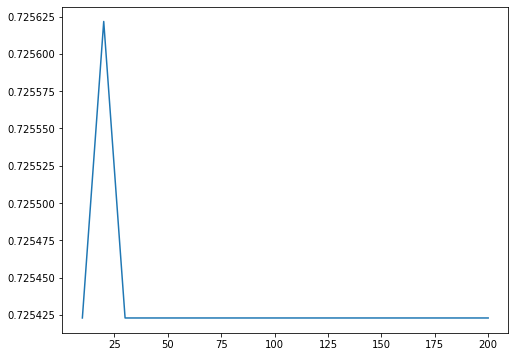

In [73]:
score = []
time0 = time()
for i in range(10,201,10):
    rfc = RFC(n_estimators= i
             ,max_depth=3
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print(max(score),np.argmax(score))
plt.figure(figsize=(8,6))
plt.plot(range(10,201,10),score)
plt.show();

## Select Max Depth

05:46:521681
Score： 0.8815328732138512 Maximum Depth： 20


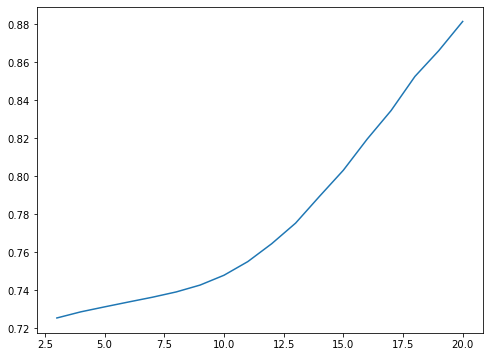

In [74]:
score = []
time0 = time()
for i in np.arange(3, 21, 1):
    rfc = RFC(n_estimators= 10
             ,max_depth= i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('Score：',max(score),'Maximum Depth：',np.arange(3, 21, 1)[np.argmax(score)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(3, 21, 1),score)
plt.show();

## Minimum segmentation sample number selection

08:06:600785
Score： 0.8034603208478679 Minimum number of branches： 3


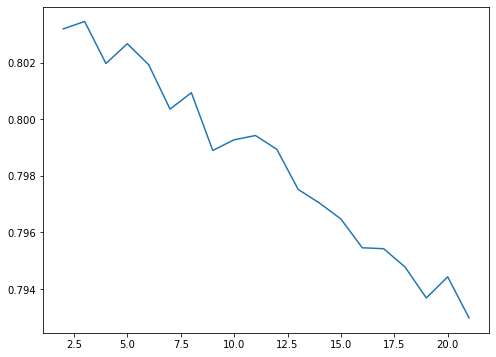

In [11]:
score_2 = []
time0 = time()
for i in np.arange(2, 22, 1):
    rfc = RFC(n_estimators= 10
             ,max_depth= 15
             ,min_samples_split= i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_2.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('Score：',max(score_2),'Minimum number of branches：',np.arange(2, 22, 1)[np.argmax(score_2)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 22, 1),score_2)
plt.show();

## Minimum leaf node sample number selection

04:25:694585
Score： 0.8031973599050375 Minimum number of leaves： 1


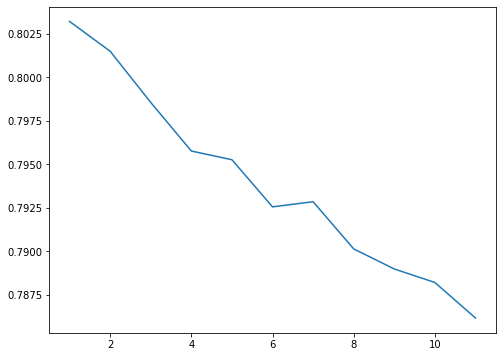

In [12]:
score_3 = []
time0 = time()
for i in np.arange(1, 12, 1):
    rfc = RFC(n_estimators= 10
             ,max_depth= 15
             ,min_samples_split= 2
             ,min_samples_leaf = i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_3.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('Score：',max(score_3),'Minimum number of leaves：',np.arange(1, 12, 1)[np.argmax(score_3)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 12, 1),score_3)
plt.show();

## Second Selection from Minimum Evaluator

20:34:36
0.8926124430903023 Optimal number of classifiers： 200


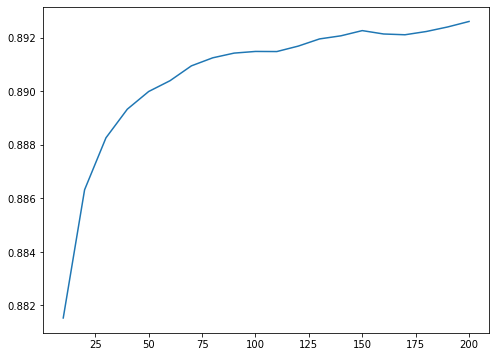

In [13]:
score_4 = []
time0 = time()
for i in range(10,201,10):
    rfc = RFC(n_estimators= i
             ,max_depth=20
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_4.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%H:%M:%S"))
print(max(score_4),'Optimal number of classifiers：',range(10,201,10)[np.argmax(score_4)])
plt.figure(figsize=(8,6))
plt.plot(range(10,201,10),score_4)
plt.show();

# Define Parameters

In [76]:
clf = RFC(n_estimators=200
         ,max_depth=20
         ,min_samples_leaf=1
         ,min_samples_split=3
         ,random_state=0
         )
clf = clf.fit(Xtrain_new,ytrain)

In [77]:
clf.score(Xtrain_new,ytrain)

0.9261948687368131

In [78]:
clf.score(Xtest_new,ytest)

0.8942478645692421

In [39]:
 clf = RFC(n_estimators=180
         ,max_depth=20
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
clf = clf.fit(Xtrain_new,ytrain)

In [40]:
clf.score(Xtrain_new,ytrain)

0.9267166499986541

In [41]:
clf.score(Xtest_new,ytest)

0.8947454875739188

In [42]:
# from sklearn.model_selection import GridSearchCV 

In [43]:
# time0 = time()
# rfc = RFC(n_estimators= 10
#           ,random_state=0)
# GS = GridSearchCV(rfc,param_grid,cv=5)
# GS.fit(Xtrain_new,ytrain)
# print('Best Parameters：',GS.best_params_)
# print('Best Score：',GS.best_score_)
# print(datetime.datetime.fromtimestamp(time()-time0).strftime("%H:%M:%S"))

In [44]:
clf.feature_importances_

array([0.14539881, 0.16489804, 0.15960435, 0.11233295, 0.14936642,
       0.16627315, 0.10212627])

In [45]:
Xtest_new.columns

Index(['lasthtlordergap', 'cityorders', 'lastpvgap', 'cr', 'sid',
       'visitnum_oneyear', 'h'],
      dtype='object')

In [46]:
from sklearn.metrics import auc, roc_curve

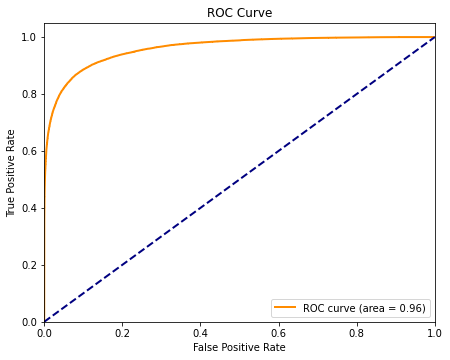

In [79]:
from sklearn.metrics import auc, roc_curve
model = RFC(n_estimators=200
         ,max_depth=20
         ,min_samples_leaf=1
         ,min_samples_split=3
         ,random_state=0
         )
# ROC
y_score = model.fit(Xtrain_new, ytrain).predict_proba(Xtest_new)  # Random Forest
fpr, tpr, thresholds = roc_curve(ytest, y_score[:, 1])
roc_auc = auc(fpr, tpr)
def drawRoc(roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc, fpr, tpr)

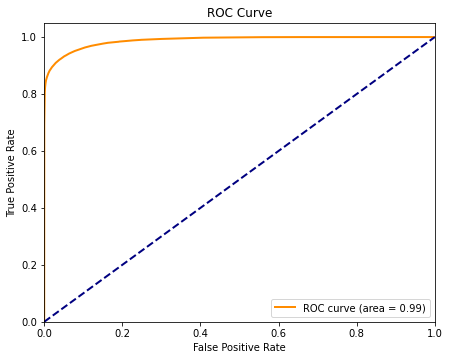

In [80]:
from sklearn.metrics import auc, roc_curve
model = RFC()
# ROC
y_score = model.fit(Xtrain_new, ytrain).predict_proba(Xtest_new)  # Random Forest
fpr, tpr, thresholds = roc_curve(ytest, y_score[:, 1])
roc_auc = auc(fpr, tpr)
def drawRoc(roc_auc, fpr, tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc, fpr, tpr)